# virtual4C
## CLI mode
`4C.yaml`

```yaml
trackc:
  - ax: t1
    height: 4
    track_type: hicmap
    track_para:
      mat:
        method: extractContactRegions
        clr: ./github/seqyuan/trackc_data/tutorials/4C/GSM4604287_1360.sub.cool
        balance: False
      mapC:
        map_type: tri
        label: AML 1360
        cmap: PuBu
        maxrange: 6
        minrange: -6

  - ax: t2
    height: 0.7
    track_type: gene_track
    track_para:
      bed12: ./github/seqyuan/trackc_data/tutorials/4C/GRCh38.gene.chr8chr14.bed12
      line: 3
      gene_fontszie: 10
      show_label: 
        - MYC
  - ax: t3
    height: 0.7
    track_type: bw_track
    track_para:
      bw: ./github/seqyuan/trackc_data/tutorials/4C/GSM4604189_H3K27ac.bw
      maxrange: 10
      label: H3K27ac
      binsize: 10000
      invert_y: False
  - ax: t4
    height: 0.6
    track_type: virtual4C
    track_para:
      clr: ./github/seqyuan/trackc_data/tutorials/4C/GSM4604287_1360.sub.cool
      maxrange: 10
      label: Virtual 4C
      target_color: tab:red
      track_type: line
      target: chr8:127735434-127735435

  - ax: t5
    height: 0.6
    track_type: multi_scale_track
    track_para:
      scale_adjust: Mb
      intervals: 1
      tick_fontsize: 8
```

```shell
trackc cli 4C.yaml -s 6,0.75 -r 'chr8:127000000-129200000 chr14:96500000-99300000'
```

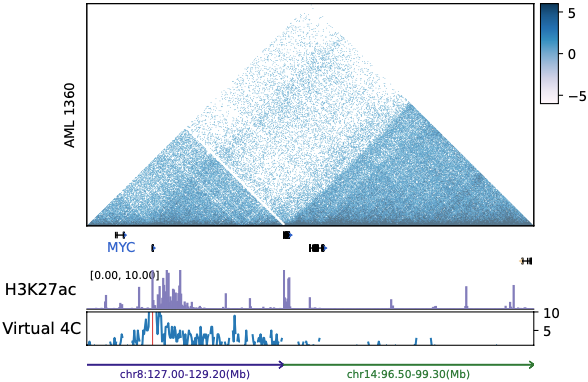

## API mode

In [2]:
import pandas as pd
import trackc as tc
import pyBigWig

In [8]:
AML_1360 = "../../../trackc_data/tutorials/4C/GSM4604287_1360.sub.cool"

regions = ["chr8:127000000-129200000", "chr14:96500000-99300000"]
MYC_TSS = "chr8:127735434-127735435"

AML_1360_H3K27ac = pyBigWig.open("../../../trackc_data/tutorials/4C/GSM4604189_H3K27ac.bw")

In [6]:
gene_bed12 = pd.read_table(
    "../../../trackc_data/tutorials/4C/Homo_sapiens.GRCh38.105.chr.bed13", 
    header=None
)
gene_bed12 = gene_bed12[gene_bed12[12] == "protein_coding"]
gene_bed12[0] = "chr" + gene_bed12[0]

display(gene_bed12.head(2))

0        1        2         3   4  5        6        7   8   9   \
0  chr1  1211340  1214153   TNFRSF4   0  -  1214153  1214153   0  12   
1  chr1  1203508  1206592  TNFRSF18   0  -  1206592  1206592   0  10   

                                               10  \
0  170,122,101,66,196,128,285,155,793,492,103,119   
1          186,122,87,452,207,202,460,310,124,181   

                                                  11              12  
0  1213983,1213663,1212992,1212638,1211942,121170...  protein_coding  
1  1206385,1205370,1204399,1203508,1206385,120403...  protein_coding

maxrange: 12 minrange: 0
maxrange: 10 minrange: 1.0


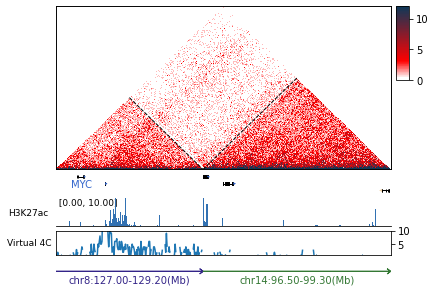

In [24]:
ten = tc.tenon(figsize=(6, 0.75))
ten.add(pos="bottom", height=4)
ten.add(pos="bottom", height=0.5, hspace=0.1)
ten.add(pos="bottom", height=0.7, hspace=0.1)
ten.add(pos="bottom", height=0.6, hspace=0.1)
ten.add(pos="bottom", height=0.6, hspace=0.1)

from matplotlib.colors import LinearSegmentedColormap, ListedColormap

fruitpunch3 = LinearSegmentedColormap.from_list(
    "fruitpunch3", [(0, "white"), (0.02, "w"), (0.25, "r"), (1, "#0E3858")], N=100
)
#CF3F35

aml = tc.tl.extractContactRegions(clr=AML_1360, row_regions=regions)
tc.pl.mapC(
    ax=ten.axs(0),
    mat=aml.cmat,
    maxrange=12,
    minrange=0,
    cmap=fruitpunch3,
    logdata=False,
    map_type="triangle",
    symmetric=False,
)
tc.pl.mapc_markline(
    ax=ten.axs(0),
    row_regions=aml.row_regions,
    map_type="triangle",
    binsize=20000,
    map_order=0,
    symmetric=False,
    show_regions_edge=True,
)

tc.pl.gene_track(
    ax=ten.axs(1),
    bed12=gene_bed12,
    regions=regions,
    line=3,
    gene_fontszie=10,
    show_label=["MYC"],
)
tc.pl.bw_track(
    AML_1360_H3K27ac,
    ten.axs(2),
    regions=regions,
    vmax=10,
    label="H3K27ac",
    binsize=10000,
    tick_fontsize=9,
)

tc.pl.virtual4C(
    ax=ten.axs(3),
    clr=AML_1360,
    target=MYC_TSS,
    regions=regions,
    maxrange=10,
    target_color="tab:red",
    track_type="line",
    label="Virtual 4C",
    label_fontsize=9,
)

tc.pl.multi_scale_track(
    ten.axs(4),
    regions=regions,
    scale_adjust="Mb",
    intervals=1,
    tick_rotation=0,
    tick_fontsize=10,
)
# tc.savefig('trackc_v4c.pdf')